<a href="https://colab.research.google.com/github/Aa1609/IBM_Internship_Project/blob/main/sentimentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentimental Analysis of Restaurant Reviews
## 1. Objective

The objective of this code is to perform sentiment analysis on a dataset of restaurant reviews using natural language processing (NLP) techniques and a Multinomial Naive Bayes classifier. The code aims to achieve the following:

1. Load and preprocess a restaurant review dataset, including text cleaning and data exploration.
2. Transform the text data into numerical features using CountVectorizer.
3. Split the dataset into training and testing sets for model evaluation.
4. Train a Multinomial Naive Bayes classifier to predict sentiment (liked or not liked) based on the text of the reviews.
5. Evaluate the model's performance using metrics such as accuracy, precision, recall, and a confusion matrix.
6. Perform hyperparameter tuning to find the best alpha value for the classifier.
7. Re-train the classifier with the optimal alpha value.
8. Provide a function to predict the sentiment of a sample review.

The code aims to build a reliable sentiment analysis model for restaurant reviews and demonstrate its usage on sample reviews.

# Data Source
Dataset for making this model was provided to me under IBM internship.

**Attributes**:

**Review**: This column contains the text of the customer's review, where they **express** their opinions and experiences regarding the restaurant visit.

Liked: This binary column (1 or 0) serves as the target variable. A value of 1 typically indicates that the customer liked the restaurant, while a value of 0 suggests that they did not like it.

**Size**: The dataset used in the code snippet appears to contain 1000 rows (reviews) and 2 columns (Review and Liked).

**Purpose**: This dataset is commonly used for sentiment analysis tasks, where the goal is to develop machine learning models that can automatically classify text as positive (liked) or negative (not liked) based on the content of the review. It serves as a practice dataset for natural language processing and text classification tasks.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset into out Notebook

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Restaurant_Reviews.csv')

### Exploring Dataset

In [ ]:
data.shape

(1000, 2)

In [ ]:
data.columns

Index([' Review', 'Liked'], dtype='object')

In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
data.describe

<bound method NDFrame.describe of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

### Data Preprocessing

In [ ]:
nltk.download('stopwords')
collection = []

for i in range(0, 1000):
    reviews = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data[' Review'][i])
    reviews = reviews.lower()
    review_words = reviews.split()
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    reviews = [ps.stem(word) for word in review_words]
    reviews = ' '.join(reviews)
    collection.append(reviews)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(collection).toarray()
y = data.iloc[:, 1].values

### Training Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2568)

# Training a Multinomial Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Making predictions with our model
y_pred = naive_bayes_classifier.predict(X_test)

### Evaluation of our Model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)

Accuracy: 79.0
Precision: 76.85185185185185
Recall: 83.0


### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)

In [ ]:
conf

array([[75, 25],
       [17, 83]])

Text(95.72222222222221, 0.5, 'Actual Values')

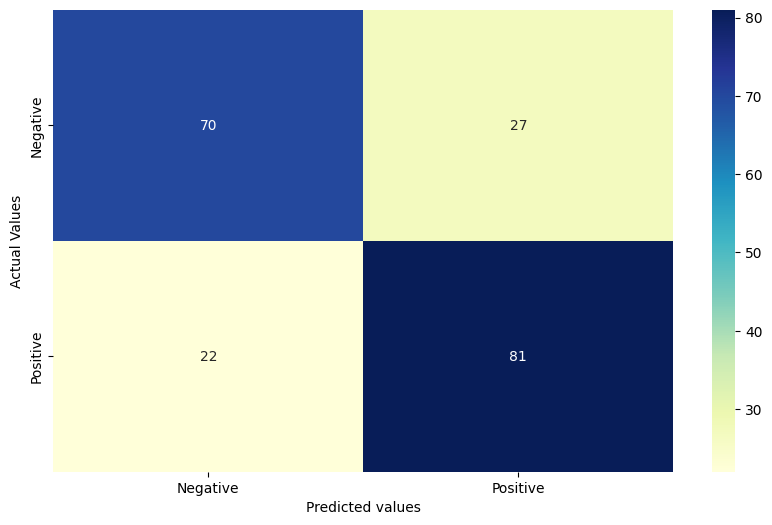

In [ ]:
plt.figure(figsize =(10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')

### Hyperparameter Tuning

In [ ]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE
best_accuracy =0.0
alpha_val =0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier =MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred =temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy Score for alpha={} is {}%".format(round(i,1),round(score*100,3)))
  if score>best_accuracy:
     best_accuracy=score
     alpha_val =i
print('----------------------------------------------------')
print("The Best Accuracy Score is {}% with alpha value as {}".format(round(best_accuracy*100, 2), round(alpha_val, 1)))

Accuracy Score for alpha=0.1 is 79.5%
Accuracy Score for alpha=0.2 is 78.5%
Accuracy Score for alpha=0.3 is 78.5%
Accuracy Score for alpha=0.4 is 79.0%
Accuracy Score for alpha=0.5 is 79.0%
Accuracy Score for alpha=0.6 is 79.0%
Accuracy Score for alpha=0.7 is 79.0%
Accuracy Score for alpha=0.8 is 78.5%
Accuracy Score for alpha=0.9 is 79.0%
Accuracy Score for alpha=1.0 is 79.0%
----------------------------------------------------
The Best Accuracy Score is 79.5% with alpha value as 0.1


Here we're getting best accuracy with alpha value as 0.1, hence we will now train our model with alpha value as 0.1.

### Re-training the model with best alpha value

In [ ]:
naive_bayes_classifier = MultinomialNB(alpha=0.1)
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = cv.transform([final_review]).toarray()
    return naive_bayes_classifier.predict(temp)

In [ ]:
sample_review = 'The food can be much better'

if predict_sentiment(sample_review):
    print("This is a Positive review")
else:
    print("This is a Negative review")

This is a Negative review


In [ ]:
sample_review = 'I love spicy food'

if predict_sentiment(sample_review):
    print("This is a Positive review")
else:
    print("This is a Negative review")

This is a Positive review


In [ ]:
sample_review = 'You can not fire a chef like this, yummy'

if predict_sentiment(sample_review):
    print("This is a Positive review")
else:
    print("This is a Negative review")

This is a Positive review


# Explanation
* The code successfully achieves an accuracy of 79.5% on the testing data with an alpha value of 0.1, indicating that it performs reasonably well in classifying sentiment.
* The predict_sentiment function allows users to input their own reviews and receive predictions about whether those reviews express positive or negative sentiment.

Overall, this code provides a comprehensive example of sentiment analysis using a Multinomial Naive Bayes classifier, with an emphasis on data preprocessing, model training, evaluation, and hyperparameter tuning.